### import modules

In [1]:
import numpy as np
import pandas as pd

import time
from tqdm import tqdm

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, LSTM, InputLayer
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

### Data Preprocessing

In [2]:
data = pd.read_csv("../AdaBoost-GRU&Sentiment(1w)/data.csv", index_col = 0)

In [3]:
data.head()

,Open,compound
0,22869.90,0.150577
1,22862.33,0.123553
2,22907.00,0.102977
3,22911.60,0.117120
4,22890.44,0.115298


In [4]:
data.shape

(719, 2)

In [5]:
plt.rcParams["figure.figsize"] = (15,10)

Text(0.5, 1.0, 'sentiment score')

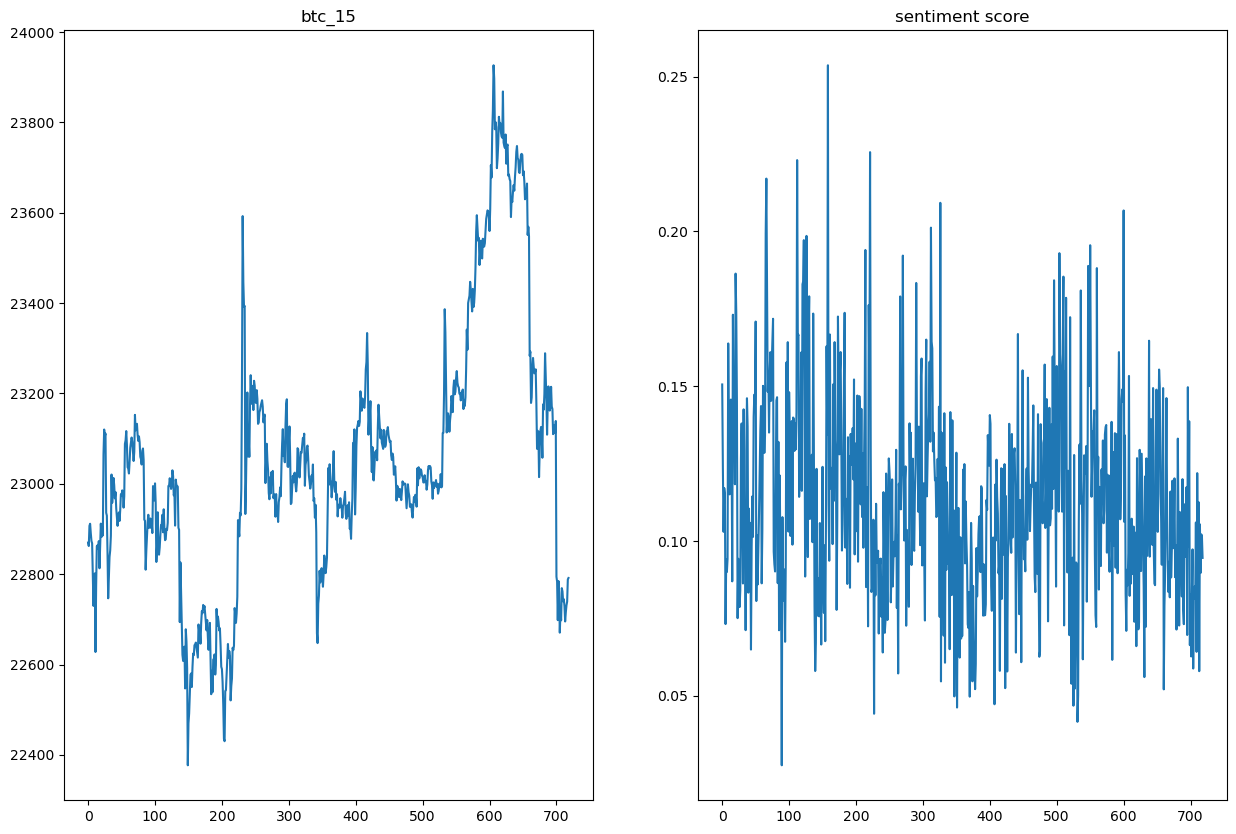

In [6]:
plt.subplot(1,2,1)
plt.plot(data['Open'])
plt.title('btc_15')
plt.subplot(1,2,2)
plt.plot(data['compound'])
plt.title('sentiment score')

In [7]:
def preprocessing(series, window_size=None, scaling=True):

    if window_size!=None:
        series = series.rolling(window_size, min_periods=0).mean()
        array = np.array(series)
    
    if scaling==True:
        scaler1 = MinMaxScaler()
        open = scaler1.fit_transform(array[:,0].reshape(-1,1))
        scaler2 = MinMaxScaler()
        score = scaler2.fit_transform(array[:,1].reshape(-1,1))
        training_data = np.concatenate([open, score], 1)
    else:
        scaler1 = None

    return training_data, scaler1

In [8]:
def make_dataset(training_data, t, h=0, test_size=0.2):
    
    X_train = []
    y_train = []
    for i in range(t, len(training_data)-h):
        X_train.append(training_data[i-t:i])
        y_train.append(training_data[i+h])
    X = np.array(X_train)
    y = np.array(y_train)[:,0]

    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    return X_train,X_test,y_train,y_test

In [9]:
training_data, scaler1 = preprocessing(data, window_size=10)

In [10]:
X_train, X_test, y_train, y_test = make_dataset(training_data, t = 168)

### MAE, MSE, RMSE

In [11]:
def MAE(y_true, y_pred):
    return "{:.2e}".format(np.mean(np.abs(y_true-y_pred)))

def MSE(y_true, y_pred):
    return "{:.2e}".format(np.mean(np.square(y_true-y_pred)))

def RMSE(y_true, y_pred):
    return "{:.2e}".format(np.sqrt(np.mean(np.square(y_true-y_pred))))

### Train Model:GRU-Adaboost

In [12]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], 2)))
model.add(GRU(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# adaboost
GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=20, batch_size=30)
final_model = AdaBoostRegressor(GRU_Predictors, n_estimators=5, random_state=42, learning_rate=2)

In [14]:
final_model.fit(X_train,y_train)

Epoch 1/20


c:\Anaconda3\envs\venv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 6s 141ms/step - loss: 0.0552
Epoch 2/20
15/15 [==============================] - 2s 150ms/step - loss: 0.0099
Epoch 3/20
15/15 [==============================] - 2s 149ms/step - loss: 0.0043
Epoch 4/20
15/15 [==============================] - 2s 142ms/step - loss: 0.0034
Epoch 5/20
15/15 [==============================] - 2s 129ms/step - loss: 0.0030
Epoch 6/20
15/15 [==============================] - 2s 126ms/step - loss: 0.0021
Epoch 7/20
15/15 [==============================] - 2s 128ms/step - loss: 0.0022
Epoch 8/20
15/15 [==============================] - 2s 132ms/step - loss: 0.0026
Epoch 9/20
15/15 [==============================] - 2s 128ms/step - loss: 0.0023
Epoch 10/20
15/15 [==============================] - 2s 133ms/step - loss: 0.0023
Epoch 11/20
15/15 [==============================] - 2s 137ms/step - loss: 0.0019
Epoch 12/20
15/15 [==============================] - 2s 135ms/step - loss: 0.0024
Epoch 13/20
15/15 [=================

c:\Anaconda3\envs\venv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 3s 156ms/step - loss: 0.0026
Epoch 2/20
15/15 [==============================] - 2s 157ms/step - loss: 0.0025
Epoch 3/20
15/15 [==============================] - 2s 160ms/step - loss: 0.0023
Epoch 4/20
15/15 [==============================] - 3s 173ms/step - loss: 0.0020
Epoch 5/20
15/15 [==============================] - 3s 167ms/step - loss: 0.0021
Epoch 6/20
15/15 [==============================] - 3s 170ms/step - loss: 0.0018
Epoch 7/20
15/15 [==============================] - 3s 172ms/step - loss: 0.0020
Epoch 8/20
15/15 [==============================] - 3s 181ms/step - loss: 0.0018
Epoch 9/20
15/15 [==============================] - 3s 182ms/step - loss: 0.0021
Epoch 10/20
15/15 [==============================] - 3s 187ms/step - loss: 0.0022
Epoch 11/20
15/15 [==============================] - 3s 188ms/step - loss: 0.0016
Epoch 12/20
15/15 [==============================] - 3s 187ms/step - loss: 0.0018
Epoch 13/20
15/15 [=================

c:\Anaconda3\envs\venv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 5s 248ms/step - loss: 0.0017
Epoch 2/20
15/15 [==============================] - 4s 257ms/step - loss: 0.0018
Epoch 3/20
15/15 [==============================] - 6s 384ms/step - loss: 0.0021
Epoch 4/20
15/15 [==============================] - 4s 288ms/step - loss: 0.0027
Epoch 5/20
15/15 [==============================] - 4s 276ms/step - loss: 0.0027
Epoch 6/20
15/15 [==============================] - 4s 235ms/step - loss: 0.0017
Epoch 7/20
15/15 [==============================] - 4s 237ms/step - loss: 0.0018
Epoch 8/20
15/15 [==============================] - 3s 199ms/step - loss: 0.0019
Epoch 9/20
15/15 [==============================] - 3s 205ms/step - loss: 0.0016
Epoch 10/20
15/15 [==============================] - 3s 211ms/step - loss: 0.0017
Epoch 11/20
15/15 [==============================] - 3s 205ms/step - loss: 0.0014
Epoch 12/20
15/15 [==============================] - 3s 211ms/step - loss: 0.0015
Epoch 13/20
15/15 [=================

c:\Anaconda3\envs\venv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 5s 258ms/step - loss: 0.0016
Epoch 2/20
15/15 [==============================] - 4s 255ms/step - loss: 0.0015
Epoch 3/20
15/15 [==============================] - 4s 255ms/step - loss: 0.0016
Epoch 4/20
15/15 [==============================] - 4s 263ms/step - loss: 0.0019
Epoch 5/20
15/15 [==============================] - 4s 261ms/step - loss: 0.0017
Epoch 6/20
15/15 [==============================] - 4s 261ms/step - loss: 0.0015
Epoch 7/20
15/15 [==============================] - 4s 271ms/step - loss: 0.0018
Epoch 8/20
15/15 [==============================] - 4s 258ms/step - loss: 0.0015
Epoch 9/20
15/15 [==============================] - 4s 260ms/step - loss: 0.0018
Epoch 10/20
15/15 [==============================] - 4s 268ms/step - loss: 0.0017
Epoch 11/20
15/15 [==============================] - 4s 261ms/step - loss: 0.0015
Epoch 12/20
15/15 [==============================] - 4s 260ms/step - loss: 0.0017
Epoch 13/20
15/15 [=================

c:\Anaconda3\envs\venv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 6s 286ms/step - loss: 0.0016
Epoch 2/20
15/15 [==============================] - 5s 311ms/step - loss: 0.0015
Epoch 3/20
15/15 [==============================] - 5s 308ms/step - loss: 0.0015
Epoch 4/20
15/15 [==============================] - 4s 286ms/step - loss: 0.0015
Epoch 5/20
15/15 [==============================] - 4s 287ms/step - loss: 0.0016
Epoch 6/20
15/15 [==============================] - 4s 299ms/step - loss: 0.0014
Epoch 7/20
15/15 [==============================] - 4s 296ms/step - loss: 0.0015
Epoch 8/20
15/15 [==============================] - 4s 287ms/step - loss: 0.0013
Epoch 9/20
15/15 [==============================] - 4s 285ms/step - loss: 0.0014
Epoch 10/20
15/15 [==============================] - 4s 277ms/step - loss: 0.0014
Epoch 11/20
15/15 [==============================] - 4s 280ms/step - loss: 0.0013
Epoch 12/20
15/15 [==============================] - 4s 272ms/step - loss: 0.0015
Epoch 13/20
15/15 [=================

AdaBoostRegressor(estimator=KerasRegressor(batch_size=30, build_fn=<function <lambda> at 0x0000021DFEC12A60>, epochs=20),
                  learning_rate=2, n_estimators=5, random_state=42)

In [15]:
preds = final_model.predict(X_test)
preds = scaler1.inverse_transform(preds.reshape(-1,1))

4/4 [==============================] - 0s 69ms/step


In [16]:
preds_series = np.hstack([data['Open'][:-len(preds)], preds.squeeze(1)]) 

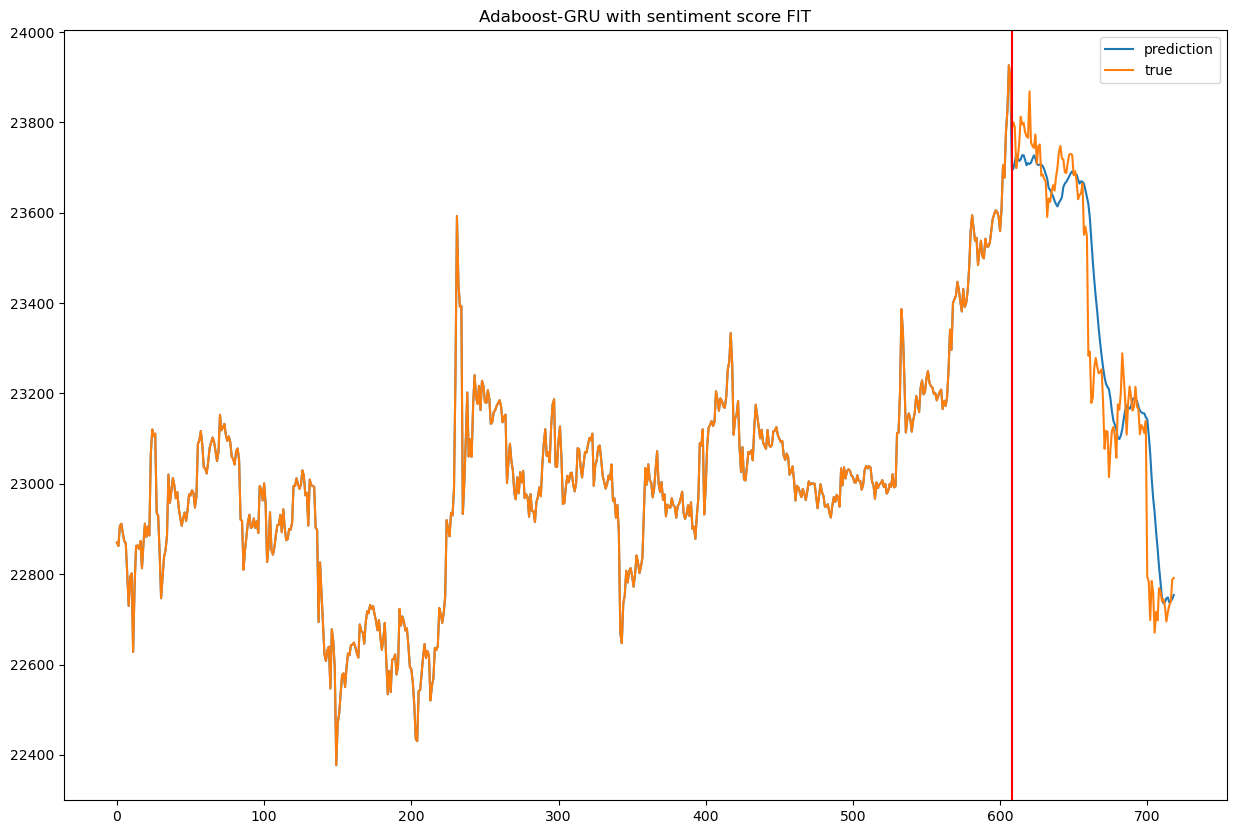

In [17]:
plt.plot(preds_series, label='prediction')
plt.plot(data['Open'], label='true')
plt.axvline(x=len(data['Open'])-len(preds), color='r')
plt.legend()
plt.title('Adaboost-GRU with sentiment score FIT')
plt.show()

In [18]:
y_true = data['Open'][-len(preds):]
y_pred = preds.squeeze(1)

In [19]:
print(MAE(y_true, y_pred))
print(MSE(y_true, y_pred))
print(RMSE(y_true, y_pred))

7.79e+01
1.33e+04
1.15e+02


## AdaBoost-LSTM

In [20]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, InputLayer
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.ensemble import AdaBoostRegressor


# Building the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))
    model.add(LSTM(units=128))
    model.add(Dropout(0.5))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Preprocess the data
training_data, scaler1 = preprocessing(data, window_size=10)
X_train, X_test, y_train, y_test = make_dataset(training_data, t=168)

# AdaBoost with LSTM
lstm_model = KerasRegressor(build_fn=lambda: build_lstm_model(input_shape=(X_train.shape[1], 2)), epochs=20, batch_size=30)
ada_lstm = AdaBoostRegressor(lstm_model, n_estimators=5, random_state=42)

ada_lstm.fit(X_train, y_train)
lstm_preds = ada_lstm.predict(X_test)


c:\Anaconda3\envs\venv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
15/15 [==============================] - 5s 166ms/step - loss: 0.0602
Epoch 2/20
15/15 [==============================] - 3s 182ms/step - loss: 0.0121
Epoch 3/20
15/15 [==============================] - 3s 202ms/step - loss: 0.0071
Epoch 4/20
15/15 [==============================] - 3s 176ms/step - loss: 0.0060
Epoch 5/20
15/15 [==============================] - 3s 169ms/step - loss: 0.0052
Epoch 6/20
15/15 [==============================] - 3s 181ms/step - loss: 0.0046
Epoch 7/20
15/15 [==============================] - 2s 162ms/step - loss: 0.0043
Epoch 8/20
15/15 [==============================] - 3s 182ms/step - loss: 0.0042
Epoch 9/20
15/15 [==============================] - 2s 156ms/step - loss: 0.0040
Epoch 10/20
15/15 [==============================] - 2s 157ms/step - loss: 0.0040
Epoch 11/20
15/15 [==============================] - 2s 149ms/step - loss: 0.0043
Epoch 12/20
15/15 [==============================] - 2s 159ms/step - loss: 0.0033
Epoch 13/20
15/15 [======

c:\Anaconda3\envs\venv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
15/15 [==============================] - 5s 169ms/step - loss: 0.0475
Epoch 2/20
15/15 [==============================] - 2s 162ms/step - loss: 0.0114
Epoch 3/20
15/15 [==============================] - 2s 165ms/step - loss: 0.0103
Epoch 4/20
15/15 [==============================] - 3s 170ms/step - loss: 0.0082
Epoch 5/20
15/15 [==============================] - 2s 165ms/step - loss: 0.0071
Epoch 6/20
15/15 [==============================] - 2s 165ms/step - loss: 0.0060
Epoch 7/20
15/15 [==============================] - 2s 162ms/step - loss: 0.0058
Epoch 8/20
15/15 [==============================] - 3s 167ms/step - loss: 0.0047
Epoch 9/20
15/15 [==============================] - 2s 164ms/step - loss: 0.0048
Epoch 10/20
15/15 [==============================] - 2s 162ms/step - loss: 0.0042
Epoch 11/20
15/15 [==============================] - 2s 156ms/step - loss: 0.0046
Epoch 12/20
15/15 [==============================] - 2s 159ms/step - loss: 0.0037
Epoch 13/20
15/15 [======

c:\Anaconda3\envs\venv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
15/15 [==============================] - 5s 165ms/step - loss: 0.0440
Epoch 2/20
15/15 [==============================] - 2s 162ms/step - loss: 0.0148
Epoch 3/20
15/15 [==============================] - 2s 167ms/step - loss: 0.0089
Epoch 4/20
15/15 [==============================] - 3s 187ms/step - loss: 0.0069
Epoch 5/20
15/15 [==============================] - 3s 167ms/step - loss: 0.0061
Epoch 6/20
15/15 [==============================] - 3s 166ms/step - loss: 0.0063
Epoch 7/20
15/15 [==============================] - 2s 164ms/step - loss: 0.0056
Epoch 8/20
15/15 [==============================] - 3s 170ms/step - loss: 0.0053
Epoch 9/20
15/15 [==============================] - 3s 173ms/step - loss: 0.0048
Epoch 10/20
15/15 [==============================] - 3s 173ms/step - loss: 0.0049
Epoch 11/20
15/15 [==============================] - 3s 171ms/step - loss: 0.0044
Epoch 12/20
15/15 [==============================] - 3s 177ms/step - loss: 0.0041
Epoch 13/20
15/15 [======

c:\Anaconda3\envs\venv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
15/15 [==============================] - 5s 154ms/step - loss: 0.0597
Epoch 2/20
15/15 [==============================] - 2s 153ms/step - loss: 0.0162
Epoch 3/20
15/15 [==============================] - 2s 154ms/step - loss: 0.0123
Epoch 4/20
15/15 [==============================] - 2s 158ms/step - loss: 0.0097
Epoch 5/20
15/15 [==============================] - 2s 151ms/step - loss: 0.0090
Epoch 6/20
15/15 [==============================] - 2s 149ms/step - loss: 0.0075
Epoch 7/20
15/15 [==============================] - 2s 156ms/step - loss: 0.0076
Epoch 8/20
15/15 [==============================] - 2s 156ms/step - loss: 0.0074
Epoch 9/20
15/15 [==============================] - 2s 146ms/step - loss: 0.0068
Epoch 10/20
15/15 [==============================] - 2s 157ms/step - loss: 0.0059
Epoch 11/20
15/15 [==============================] - 2s 160ms/step - loss: 0.0054
Epoch 12/20
15/15 [==============================] - 2s 145ms/step - loss: 0.0054
Epoch 13/20
15/15 [======

c:\Anaconda3\envs\venv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
15/15 [==============================] - 5s 152ms/step - loss: 0.0532
Epoch 2/20
15/15 [==============================] - 2s 151ms/step - loss: 0.0134
Epoch 3/20
15/15 [==============================] - 2s 158ms/step - loss: 0.0102
Epoch 4/20
15/15 [==============================] - 2s 154ms/step - loss: 0.0090
Epoch 5/20
15/15 [==============================] - 2s 151ms/step - loss: 0.0074
Epoch 6/20
15/15 [==============================] - 2s 153ms/step - loss: 0.0070
Epoch 7/20
15/15 [==============================] - 2s 162ms/step - loss: 0.0058
Epoch 8/20
15/15 [==============================] - 3s 168ms/step - loss: 0.0054
Epoch 9/20
15/15 [==============================] - 2s 159ms/step - loss: 0.0057
Epoch 10/20
15/15 [==============================] - 2s 162ms/step - loss: 0.0058
Epoch 11/20
15/15 [==============================] - 3s 176ms/step - loss: 0.0050
Epoch 12/20
15/15 [==============================] - 3s 177ms/step - loss: 0.0046
Epoch 13/20
15/15 [======

In [21]:
lstm_preds = scaler1.inverse_transform(lstm_preds.reshape(-1,1))
y_test = scaler1.inverse_transform(y_test.reshape(-1,1))
RMSE(y_test, lstm_preds)

'4.93e+01'

In [22]:
lstm_train_preds = ada_lstm.predict(X_train)
lstm_train_preds = scaler1.inverse_transform(lstm_train_preds.reshape(-1,1))
RMSE(scaler1.inverse_transform(y_train.reshape(-1,1)), lstm_train_preds)

 1/15 [=>............................] - ETA: 1s

15/15 [==============================] - 1s 46ms/step


'3.89e+01'

In [23]:
lstm_preds_series = np.hstack([data['Open'][:-len(lstm_preds)], lstm_preds.squeeze(1)]) 

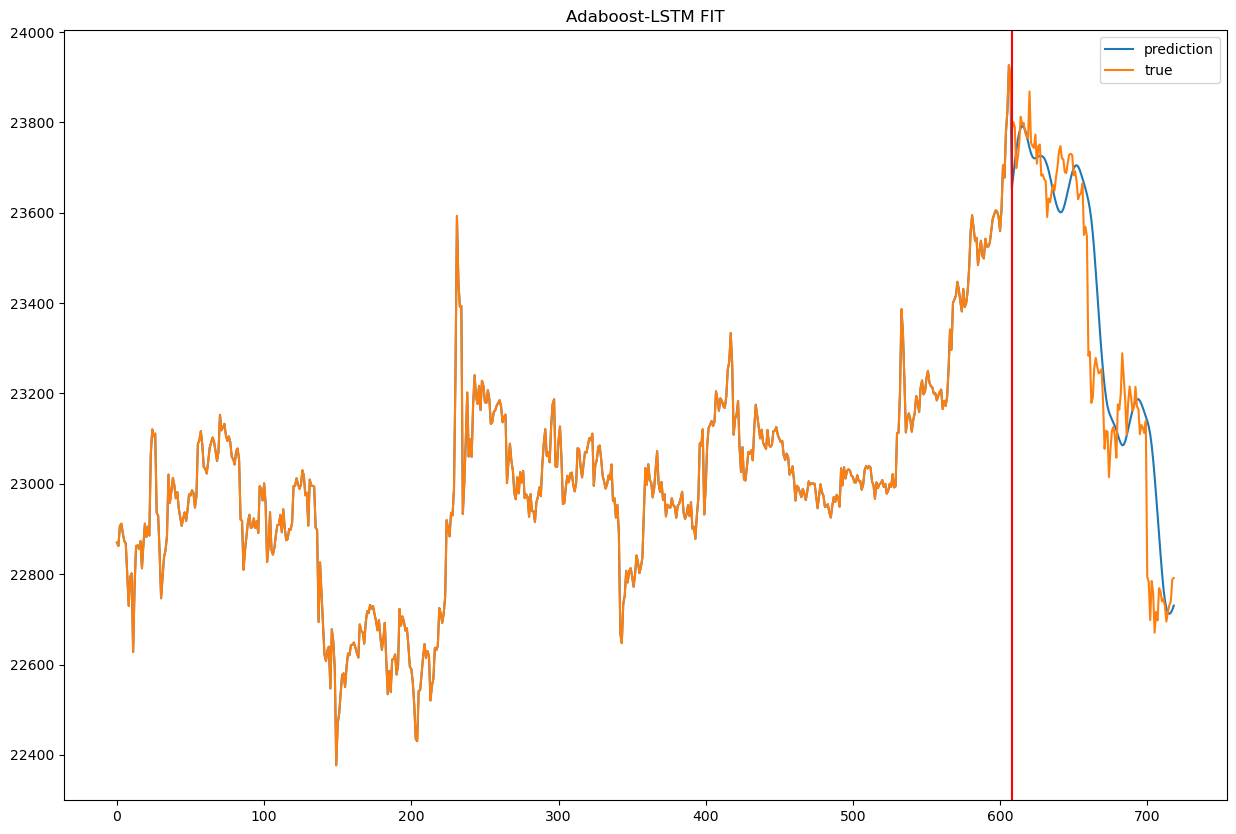

In [26]:
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(lstm_preds_series, label='prediction')
plt.plot(data['Open'], label='true')
plt.axvline(x=len(data['Open'])-len(lstm_preds), color='r')
plt.legend()
plt.title('Adaboost-LSTM FIT')
plt.show()

## LSTM

In [31]:
# Building the LSTM model
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], 2)))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predictions
predictions = model.predict(X_test)
predictions = scaler1.inverse_transform(predictions)

print(RMSE(predictions, y_test))

Epoch 1/50
14/14 [==============================] - 10s 293ms/step - loss: 0.0350
Epoch 2/50
14/14 [==============================] - 4s 303ms/step - loss: 0.0089
Epoch 3/50
14/14 [==============================] - 4s 316ms/step - loss: 0.0063
Epoch 4/50
14/14 [==============================] - 5s 343ms/step - loss: 0.0043
Epoch 5/50
14/14 [==============================] - 5s 338ms/step - loss: 0.0040
Epoch 6/50
14/14 [==============================] - 5s 329ms/step - loss: 0.0034
Epoch 7/50
14/14 [==============================] - 5s 324ms/step - loss: 0.0037
Epoch 8/50
14/14 [==============================] - 4s 321ms/step - loss: 0.0032
Epoch 9/50
14/14 [==============================] - 5s 324ms/step - loss: 0.0031
Epoch 10/50
14/14 [==============================] - 5s 344ms/step - loss: 0.0031
Epoch 11/50
14/14 [==============================] - 4s 302ms/step - loss: 0.0032
Epoch 12/50
14/14 [==============================] - 4s 322ms/step - loss: 0.0029
Epoch 13/50
14/14 [=====

In [32]:
lstm_preds_series = np.hstack([data['Open'][:-len(predictions)], predictions.squeeze(1)]) 

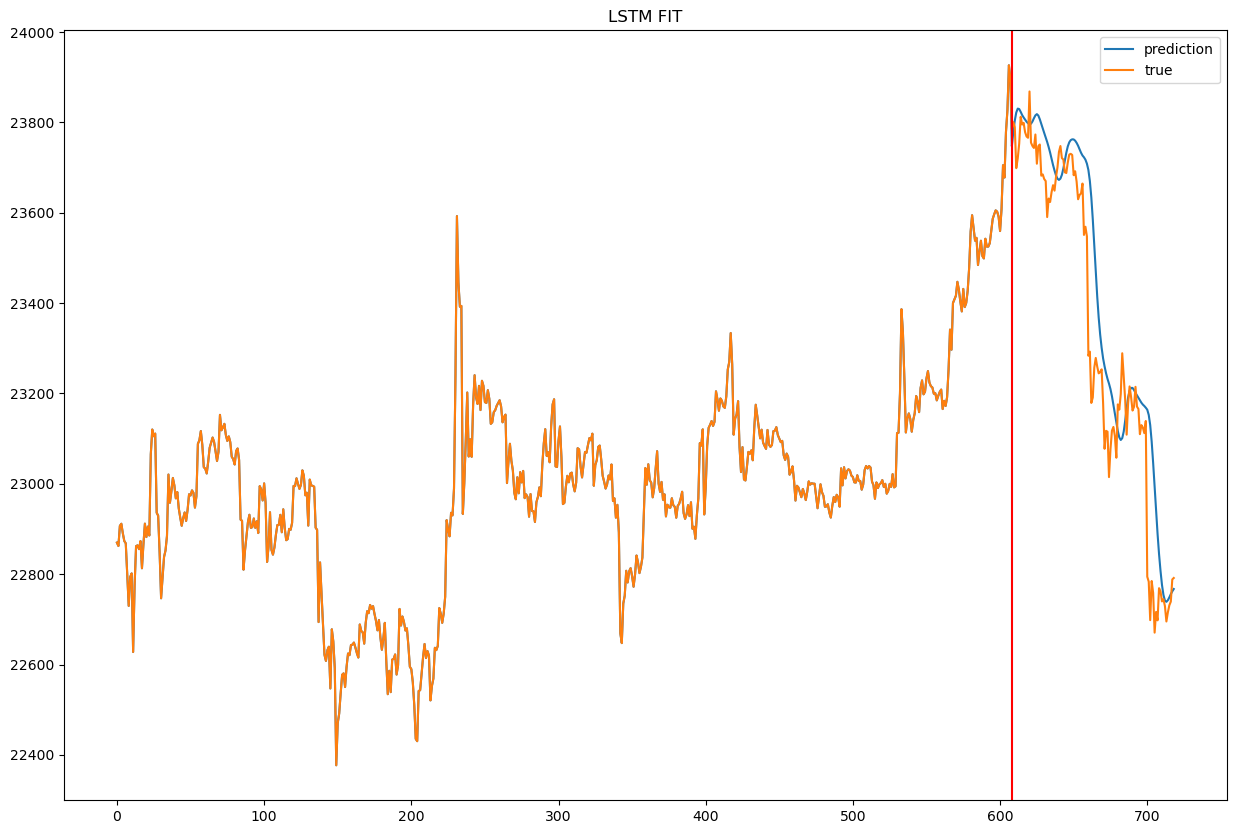

In [33]:
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(lstm_preds_series, label='prediction')
plt.plot(data['Open'], label='true')
plt.axvline(x=len(data['Open'])-len(predictions), color='r')
plt.legend()
plt.title('LSTM FIT')
plt.show()

## GRU

In [34]:
# Building the GRU model
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], 2)))
model.add(GRU(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predictions
gru_preds = model.predict(X_test)
gru_preds = scaler1.inverse_transform(gru_preds)

print(RMSE(gru_preds, y_test))

Epoch 1/50
14/14 [==============================] - 8s 228ms/step - loss: 0.0406
Epoch 2/50
14/14 [==============================] - 3s 245ms/step - loss: 0.0092
Epoch 3/50
14/14 [==============================] - 3s 234ms/step - loss: 0.0045
Epoch 4/50
14/14 [==============================] - 3s 227ms/step - loss: 0.0037
Epoch 5/50
14/14 [==============================] - 4s 276ms/step - loss: 0.0031
Epoch 6/50
14/14 [==============================] - 4s 275ms/step - loss: 0.0030
Epoch 7/50
14/14 [==============================] - 4s 276ms/step - loss: 0.0027
Epoch 8/50
14/14 [==============================] - 4s 293ms/step - loss: 0.0022
Epoch 9/50
14/14 [==============================] - 4s 268ms/step - loss: 0.0024
Epoch 10/50
14/14 [==============================] - 4s 267ms/step - loss: 0.0023
Epoch 11/50
14/14 [==============================] - 4s 263ms/step - loss: 0.0019
Epoch 12/50
14/14 [==============================] - 4s 250ms/step - loss: 0.0020
Epoch 13/50
14/14 [======

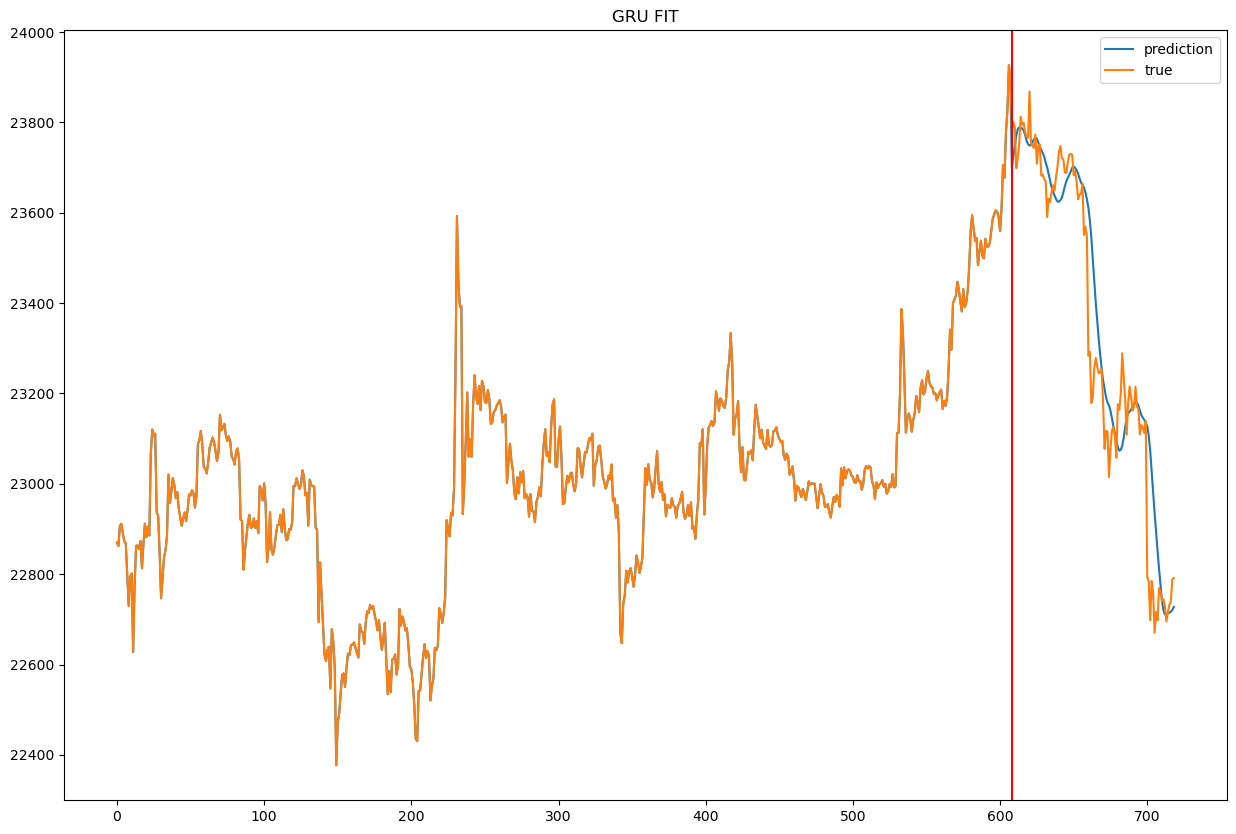

In [35]:
gru_preds_series = np.hstack([data['Open'][:-len(gru_preds)], gru_preds.squeeze(1)]) 
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(gru_preds_series, label='prediction')
plt.plot(data['Open'], label='true')
plt.axvline(x=len(data['Open'])-len(gru_preds), color='r')
plt.legend()
plt.title('GRU FIT')
plt.show()